## __Statistical and Linguistic Insights for Model Explanation - SLIME__ 
### __Model explainability__
<font size=3>

In [2]:
from os import environ
environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

from slime_nlp.dataset import ImportData
from slime_nlp.model import CustomModel
from slime_nlp.slime import ExplainModel
from slime_nlp.slime import Stat

## 1. __$\mathtt{ExplainModel}$:__
<font size=3>
    
For model explainability, we use the $\mathtt{ExplainModel}$ object, which provides:

* $\mathtt{explain()}$: Computes attribution scores for the text.
* $\mathtt{model\_prediction()}$: Returns predictions using the fine-tuned $\mathtt{CustomModel}$ weights.
* $\mathtt{visualize()}$: Highlights text tokens with attribution scores based on [Integrated Gradients](https://arxiv.org/abs/1703.01365).
* $\mathtt{attribution\_by\_token()}$: Outputs a dataframe containing explainability scores for each token.

Refer to the $\mathtt{ExplainModel}$ documentation below for details.

In [2]:
exp = ExplainModel(model_name="../weights/best_model.pt", n_steps=10)  

print(exp.__doc__)


    # ExplainModel: model explanability tools for data processing and visualization.
    
    Input: (model_name=None, device='cpu', n_steps=50, pretrained_name="google-bert/bert-base-cased")
    -----
    - model_name (str): string with the path and model's name.
    - device (str): select CPU or GPU device for output tensors.
    - n_steps (int): number of steps for Integrated Gradient approximation.
    - pretained_name (str): pretrained model name from huggingface.co repository.
    
    
    Methods:
    -------
    - explain: (text)
      -- text (str): text as string format.
    
      Returns a dictionary with 
      > input_ids (Tensor[int]): sequence of special tokens IDs.
      > token_list (List[str]): of tokens.
      > attributions (Tensor[float]): Integrated Gradient's attribution score by token.
      > delta (Tensor[float]): Integrated Gradient's error metric.
    
    - model_prediction: (input_ids)
      -- input_ids (Tensor): sequence of special tokens IDs.
    
  

In [3]:
# Import dataset:
id = ImportData(path_name="../dataset/adress_sample.csv", group_by=["id", "text", "group"], shuffle=False, verbose=False)

text = id.train['text'][0]
text

"oh there's a cookie jar and a youngster with a i don't know what . and the boy has a shirt with a cookie <filler> jar too i guess . the girl has one too a jar . and that's the stool . and this is <filler> with a kitchen thing <filler> dishes . and this is water somebody spilled . what do you call this . i don't know . i guess it's another for the . i don't know what's hɑɹu xn nuk in there . the tentu xn nuk very interesting . oh <filler> . she's looking at it . i don't know what . that the kid's gonna fall off the stool . i hope he does . oh they're in the cookie jar . oh what are they doing . i don't know . they're spilling something good and . it's <retracing> they're doing the dishes . the boy's trying to fall off the stool and she's trying to get"

#### __1.1 $\mathtt{ExplainModel().explain()}$:__
<font size=3>

Computing the attributions from text.

In [4]:
exp_results = exp.explain(text)
exp_results.keys()

dict_keys(['input_ids', 'token_list', 'attributions', 'delta'])

#### __1.2 $\mathtt{ExplainModel().model\_prediction()}$:__
<font size=3>

Predicting condition from CustomModel.

In [5]:
pred = exp.model_prediction(exp_results['input_ids'])
pred.keys()

dict_keys(['prob', 'class'])

#### __1.3 $\mathtt{ExplainModel().visualize()}$:__
<font size=3>

The user can choose to view attributions for a specific text sample, with a color gradient indicating which tokens contribute the most to the groups.

In [6]:
data = id.train.iloc[0:2]
exp.visualize(data, cmap_size=15, colors=['blue', 'white', 'red'])#, path_name='../figs/exp.png')

True Label,Predicted Label,Predicted probability,Attribution Score
condition,condition,1.00,2.58


True Label,Predicted Label,Predicted probability,Attribution Score
control,control,0.00,-4.77


#### __1.4 $\mathtt{ExplainModel().attribution\_by\_token()}$:__
<font size=3>

Create dataframe with attribution scores by text's tokens.

In [7]:
df = exp.attribution_by_token(data, path_name="../dataset/explain_by_token.csv", return_results=True)
df.head()

,condition,group,pred_label,score,attributions,token
id,,,,,,
S118,AD,1,1,2.580766,0.000000,[CLS]
S118,AD,1,1,2.580766,0.025740,oh
S118,AD,1,1,2.580766,0.093974,there
S118,AD,1,1,2.580766,0.069379,'
S118,AD,1,1,2.580766,0.100859,s


## __2. $\mathtt{Stat}$:__
<font size=3>

For model explainability, we use the $\mathtt{ExplainModel}$ object, which provides:

* $\mathtt{plot\_dist()}$: Returns ....
* $\mathtt{plot\_scatter()}$: Returns ....
* $\mathtt{plot\_bars()}$: Returns ....

Refer to the $\mathtt{Stat()}$ documentation below for details.

In [4]:
stat = Stat(path_data="../dataset/interpret.csv", 
            features=["BigWords", ...], 
            rand_value=10, 
            path_results=None)

print(stat.__doc__)


    # Stat: .....

    Input: (path_data, features, rand_value=5000, path_results=None)
    -----
    - path_data (str): string with path and dataset name. This file is the user-dependent tagger output, 
    containing columns for tokens and associated features.
    - features (List): list of features processed by the user-dependent tagger statistical computation. 
    Use Ellipsis (...) for considering an specific feature and its following ones, e.g, 
    features=["BigWords", ...].
    - rand_value (int): number of random subsamples of data. 
    - path_results (str): string with path and dataframe results' name for saving in .csv file.


    Methods:
    -------
    - plot_dist: (features, path_plot=None)
      -- features (List): list of features processed by the user-dependent tagger for visualization. Use 
      Ellipsis (...) for considering an specific feature and its following ones, e.g, 
      features=["BigWords", ...].
      -- path_plot (str): string with path and plots' 

#### __2.1 $\mathtt{Stat().plot\_dist()}$__:
<font size=3>


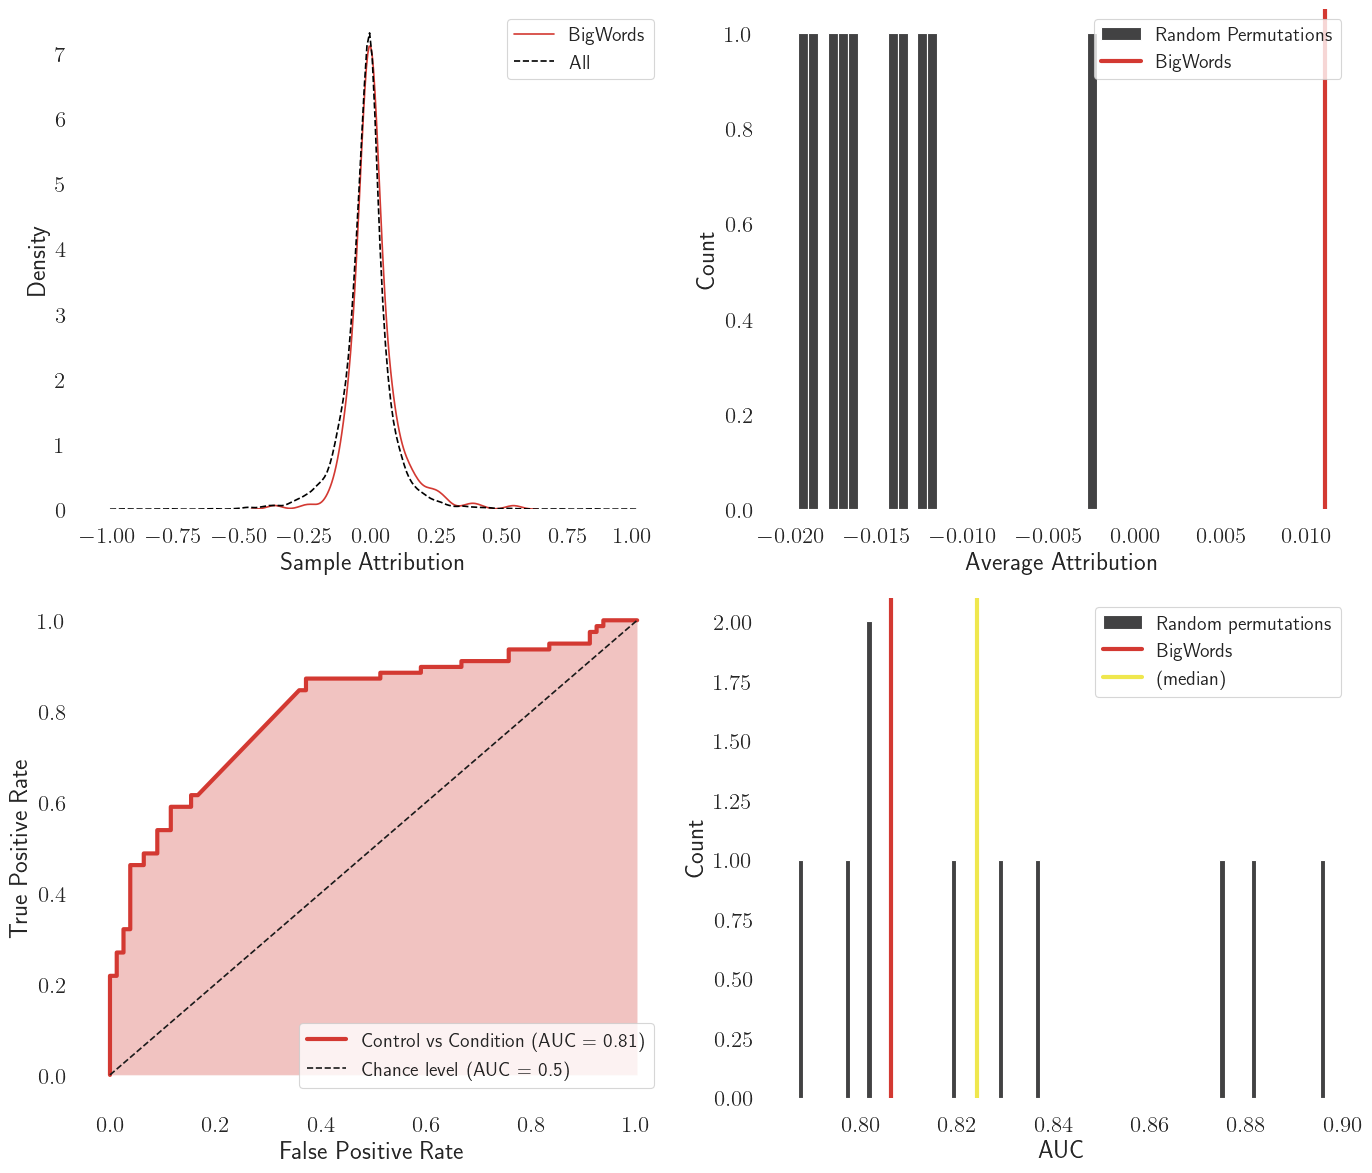

In [9]:
stat.plot_dist(features=['BigWords'], path_plot=None)

#### __2.2 $\mathtt{Stat().plot\_scatter()}$:__
<font size=3>


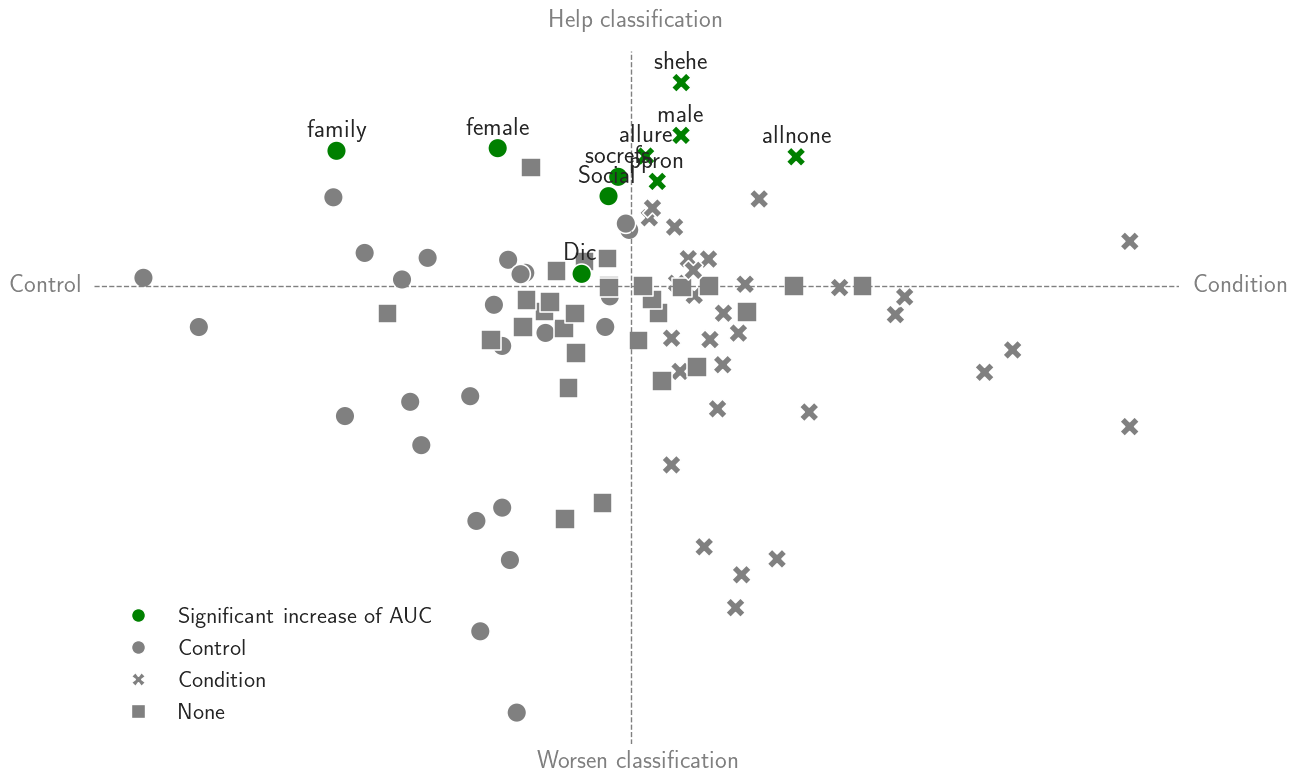

In [10]:
stat.plot_scatter(path_plot=None)

#### __2.3 $\mathtt{Stat().plot\_bars()}$:__
<font size=3>


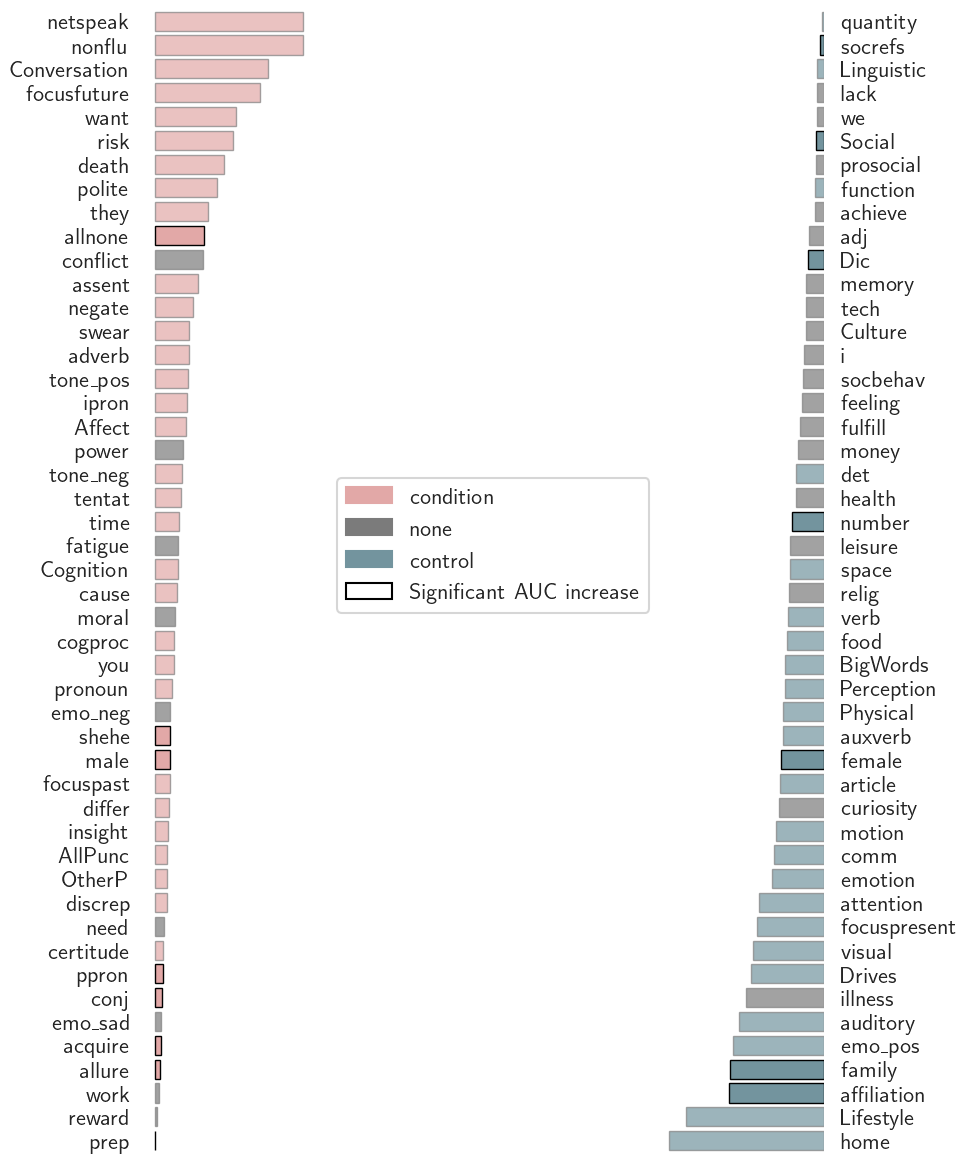

In [7]:
stat.plot_bars(path_plot=None)